In [10]:
import json
import pandas as pd
from os import listdir

In [4]:
def GolHalf(allgols):

    golsHalf2 = list()

    for gol in allgols:
        if "+" in gol:
            extraTime = gol.split("+")
            if extraTime[0] != "45":
                g = int(extraTime[0]) + int(extraTime[1].removesuffix("'"))
                golsHalf2.append(g)
        else:
            g = int(gol.removesuffix("'"))
            if g > 45:
                golsHalf2.append(g)
    
    return golsHalf2

In [5]:
def getStats(stats, categoria):
    for i in stats:
        if i['categoria'] == categoria:
            if "%" in i['home']:
                home = int(i['home'].removesuffix("%"))
                home = home / 100
                away = int(i['away'].removesuffix("%"))
                away = away / 100
                return (home, away)
            else:
                home = int(i['home'])
                away = int(i['away'])
                return (home, away)
    

In [80]:
c = 0
banca = 100
historic = list()
for i in firstGol:
    if i >= 10 or i == 0:
        banca += 2
    else:
        banca -= 5
        c += 1
    if banca < 10:
        print(banca)
    historic.append(banca)
banca



279

In [31]:
import matplotlib.pyplot as plt

In [40]:
files = listdir("data/diario/02_12/events/")

In [42]:
dia = list()
hora = list()
events = list()
placarFull = list()
placarHafTime = list()
golsHalfTime = list()
timesgol = list()
oddsHome = list()
oddsDraw = list()
oddsAway = list()

for file in files:
    with open(f"data/diario/02_12/events/{file}","r", encoding='utf-8') as jsonfile:
        reader = jsonfile.read()
        event = json.loads(reader)
        dia.append(event['time'].split(" ")[0])
        hora.append(event['time'].split(" ")[1])
        e = event['home']+" v "+event['away']
        events.append(e)
        pf = event['placar']
        placarFull.append(pf)
        pht = event['placarHaf']
        placarHafTime.append(pht)

        oddsHome.append(event['oddsHome'])
        oddsDraw.append(event['oddsDraw'])
        oddsAway.append(event['oddsAway'])

        allgols = event["allgols"]
        golsHalf = GolHalf(allgols)
        golsHalfTime.append(golsHalf)
        if len(golsHalf) == 0:
            timegol = 100
        else:
            timegol = golsHalf[0]
        timesgol.append(timegol)
        jsonfile.close()

In [43]:
data = {
    "hora": hora,
    "events" :events,
    "placarFull" :placarFull,
    "placarHafTime" :placarHafTime,
    "golsHalfTime" :golsHalfTime,
    "oddsHome": oddsHome,
    "oddsDraw": oddsDraw,
    "oddsAway": oddsAway,
    "timesgol" : timesgol
    
}

df = pd.DataFrame(data)

In [44]:
df.head()

,hora,events,placarFull,placarHafTime,golsHalfTime,oddsHome,oddsDraw,oddsAway,timesgol
0,11:00,Coreia do Sul v Portugal,2-1,1 - 1,[91],4.00,3.75,1.85,91
1,11:00,Gana v Uruguai,0-2,0 - 2,[],4.50,3.80,1.75,100
2,15:00,Anderlecht U23 v Genk U23,2-0,2 - 0,[],2.10,3.75,2.87,100
3,15:00,St. Liege U23 v Lierse K.,2-4,1 - 3,"[89, 92]",4.33,4.00,1.60,89
4,13:00,Doxa v Akritas Chloraka,2-0,2 - 0,[],-,-,-,100


In [45]:
df.to_csv("data/diario/02_12/df.csv", index=False)


In [49]:
c = 0
banca = 10
historic = list()
for i in df.timesgol:
    if i > 55:
        banca += 2
        c += 1
    else:
        banca -= 5
    historic.append(banca)
    
banca

-37

-37

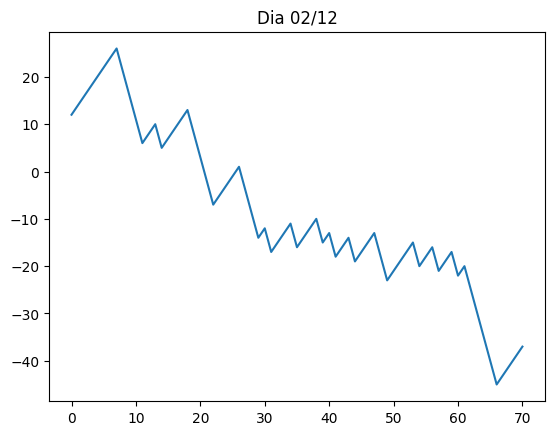

In [50]:
plt.plot(list(range(len(historic))), historic )
plt.title('Dia 02/12')
banca

30

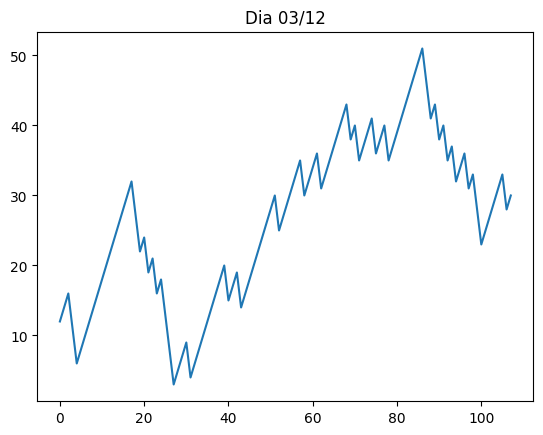

In [39]:
plt.plot(list(range(len(historic))), historic )
plt.title('Dia 03/12')
banca